# Gibbs-mintavétel hierarchikus bayesi modellekben

## Valószínűségi modell
Példaként vegyük a lineáris regressziót egydimenziós változókra, azaz $x_i,y_i \in \mathbb{R}$. Erre korábban megvizsgáltuk az ML, MAP és teljes bayesi következtetéseket. A problémát így formalizáltuk:

\begin{align}
y_i &= w \cdot x_i + b + \varepsilon, \\
\varepsilon &\sim \mathcal{N}\left(\varepsilon \mid 0,\tau^{-1}\right).
\end{align}

Most annyival tovább megyünk, hogy $\tau$-ra is priort teszünk. Könnyen látható, hogy a normál eloszlás precizitásán a konjugált prior a Gamma-eloszlás (ez hamarosan világossá válik), így $\tau$ priorját ennek megfelelően választjuk. A teljes valószínűségi modell tehát:

\begin{align}
p\left( y_i \mid x_i, w, b, \tau \right) &= \mathcal{N}\left( y_i \mid w \cdot x_i + b, \tau^{-1}\right),\\
p\left(\tau \mid \alpha, \beta \right) &= \mathcal{G}a\left(\tau \mid \alpha, \beta \right),\\
p\left(w \mid \lambda_w \right) &= \mathcal{N}\left( w \mid 0,\lambda_w^{-1}\right), \\
p\left(b \mid \lambda_b \right) &= \mathcal{N}\left( b \mid 0,\lambda_b^{-1}\right).
\end{align}

A Gibbs-mintavételhez szükségünk lesz a változók feltételes eloszlásaira, a következő szakaszban ezeket számolgatjuk ki.

## Az együttes eloszlás

Az egyes eloszlásokat részletesen kiírva:

\begin{align}
p\left( y_i \mid x_i, w, b, \tau \right) &= \sqrt{\frac{\tau}{2\pi}} \exp\left\lbrace -\frac{\tau}{2} \left(y_i - w\cdot x_i - b \right)^2\right\rbrace,\\
p\left(\tau \mid \alpha, \beta \right) &= \frac{\beta^\alpha}{\Gamma(\alpha)} \tau^{\alpha-1} \exp \left\lbrace -\beta \tau \right\rbrace, \\
p\left(w \mid \lambda_w \right) &= \sqrt{\frac{\lambda_w}{2\pi}} \exp\left\lbrace -\frac{\lambda_w}{2} w^2 \right\rbrace, \\
p\left(b \mid \lambda_b \right) &= \sqrt{\frac{\lambda_b}{2\pi}} \exp\left\lbrace -\frac{\lambda_b}{2} b^2 \right\rbrace.
\end{align}

Most írjuk fel az együttes eloszlást, ami a teljes valószínűség tétele miatt:

\begin{align}
p\left(Y,X,w,b,\tau \mid \alpha,\beta,\lambda_w,\lambda_b \right) &= \prod_i p\left( y_i \mid x_i, w, b, \tau \right) \cdot p\left(\tau \mid \alpha, \beta \right) \cdot p\left(w \mid \lambda_w \right) \cdot p\left(b \mid \lambda_b \right) .
\end{align}

Szokásos módon ismét inkább a logaritmussal fogunk számolni:

\begin{align}
\ln p\left(Y,X,w,b,\tau \mid \alpha,\beta,\lambda_w,\lambda_b\right) &= \left(\alpha-1+\frac{N}{2} \right) \ln \tau - \beta \tau - \frac{\tau}{2} \sum_i \left(y_i - w \cdot x_i - b \right)^2 -\frac{\lambda_w}{2} w^2 -\frac{\lambda_b}{2} b^2 + const.
\end{align}

## Feltételes eloszlás $\tau$-ra

Számoljuk ki elsőként $\tau$ feltételes eloszlását a többi változó ismeretében. Ehhez a fenti kifejezésből izoláljuk és csoportosítjuk a $\tau$-t tartalmazó tagokat, majd exponenciálist veszünk (az iménti logaritmust invertáljuk):
\begin{align}
p\left(\tau \mid Y,X,w,b,\alpha,\beta \right) &\propto \tau^{\alpha+\frac{N}{2}-1} \exp \left\lbrace - \left(\beta + \frac{1}{2} \sum_i \left(y_i - w \cdot x_i - b \right)^2 \right) \tau\right\rbrace .
\end{align}

Amit kaptunk, az egy konstans szorzótényezőtől eltekintve ismét egy Gamma-eloszlás! Valójában szándékosan így választottuk $\tau$ priorját (konjugált prior). Viszont tudjuk, hogy egy $\tau$ feletti eloszlást KELL kapnunk, tehát a normalizációs tag megegyezik a Gamma-eloszlás megfelelő tagjával. Összefoglalva, $\tau$-t a következő egyenletek alapján frissítjük:

\begin{align}
p\left(\tau \mid Y,X,w,b,\alpha,\beta \right)&= \mathcal{G}a \left( \tau \mid \alpha', \beta' \right), \\
\alpha' &= \alpha + \frac{N}{2}, \\
\beta' &= \beta +  \frac{1}{2} \sum_i \left(y_i - w \cdot x_i - b \right)^2 .
\end{align}

## Feltételes eloszlás $w$-re

Az együttes eloszlásból kigyűjtjük a $w$-t tartalmazó tagokat:

\begin{align}
-\frac{\tau}{2} \sum_i \left(y_i - w \cdot x_i - b \right)^2 -\frac{\lambda_w}{2} w^2 .
\end{align}

Majd kiemeljük $w$ hatványait:

\begin{align}
-\frac{1}{2} \left( \lambda_w + \tau \sum_i x_i^2 \right)w^2 + \left(\tau \sum_i (y_i-b)x_i \right)w + const.
\end{align}

A kapott kifejezést kiegészítjük teljes négyzetté (a konstans tagokkal nem törődve):

\begin{align}
-\frac{1}{2} A w^2 + Bw + const. = -\frac{A}{2} \left(w-\frac{B}{A}\right)^2 + const.
\end{align}

Ismét észrevesszük, hogy ez egy normalizációs konstanstól eltekintve egy normál eloszlás. De mivel eloszlást kellett kapnunk, a normalizációs konstans ismert, és

\begin{align}
p\left(w \mid Y,X,b,\tau,\alpha,\beta \right) &= \mathcal{N}\left( w \mid \mu_w',\lambda_w'^{-1}\right), \\
\lambda_w' &= \lambda_w + \tau \sum_i x_i^2, \\
\mu_w' &= \frac{\tau}{\lambda'_w} \sum_i (y_i-b)x_i .
\end{align}

## Feltételes eloszlás $b$-re

Az előzőhöz nagyon hasonlóan járunk el. Izoláljuk a $b$-s tagokat:

\begin{align}
-\frac{\tau}{2} \sum_i \left(y_i - w \cdot x_i - b \right)^2 -\frac{\lambda_b}{2} b^2
\end{align}

Majd kiemeljük $b$ hatványait:

\begin{align}
-\frac{1}{2} \left(\tau N + \lambda_b \right) b^2 + \left(\tau \sum_i y_i-w\cdot x_i \right) b + const.
\end{align}

Teljes négyzetté alakítás után

\begin{align}
p\left(b \mid Y,X,b,\tau,\alpha,\beta \right) &= \mathcal{N}\left( w \mid \mu_b',\lambda_b'^{-1}\right), \\
\lambda_b' &= \lambda_b + \tau N, \\
\mu_b' &= \frac{\tau}{\lambda'_b} \sum_i y_i-w\cdot x_i .
\end{align}

## Gibbs-mintavétel

A feltételes eloszlások ismeretében könnyedén implementálhatjuk a Gibbs-mintavételt:

1. Véletlenszerűen inicializáljuk $\tau$-t, $w$-t és $b$-t.
2. Kiszámítjuk $\tau$ feltételes eloszlását, egy mintával frissítjük $\tau$-t.
3. Kiszámítjuk $w$ feltételes eloszlását, egy mintával frissítjük $w$-t.
4. Kiszámítjuk $b$ feltételes eloszlását, egy mintával frissítjük $b$-t.
5. Ismétlés 2)-től.

Mindeközben folyamatosan gyűjtjük a mintákat, tehát a régi értékeket a frissítésnél nem írjuk felül. A paraméterek eloszlását a gyűjtött minták eloszlásával közelítjük (a gyakorlatban először egy ún. burn-in fázist csinálunk, hogy a Markov-lánc a keresett eloszlás "közelébe" kerüljön, ekkor még nem gyűjtjük a mintákat).

## Konvergencia-diagnosztika

A Geweke-diagnosztika azt vizsgálja, hogy van-e szignifikáns különbség a Markov-lánc kezdeti és végső szegmensében vett mintaátlagok között; ha nincs ilyen, az erős érv amellett, hogy a lánc valóban konvergált. Adott $\theta$ paraméter esetén a Markov-láncot szegmensekre osztjuk (pl. legyen a gyűjtött minták első fele az egyik szegmens, a második fele a másik szegmens), és az így kapott mintahalmazokkal $Z$-tesztet végzünk:

\begin{align}
Z = \frac{\bar\theta_1 - \bar\theta_2}{\sqrt{\frac{s_1^2}{m} + \frac{s_2^2}{m}}},
\end{align}

ahol $\bar\theta$ az átlag, $s^2$ a variancia, $m$ és $n$ pedig a szegmensek hossza. A $Z$-érték elméletben normál eloszlást követ; szignifikáns különbségről beszélünk akkor, ha a $Z$-érték a $2\times$-es szóráson ($\pm 2.58$) kívülre esik. A konvergenciát vizsgálhatjuk Geweke--Brooks ploton, ahol különböző kezdeti szegmenseken vett átlagokat hasonlítunk össze a lánc második felével; a kezdeti szegmensek úgy alakulnak, hogy a lánc első felét "szalámizzuk" tovább (pl. 10%-okat hagyunk el az elejéről). Az így kapott Z-értékeket kiplottoljuk. Példa: https://pymc-devs.github.io/pymc/modelchecking.html

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


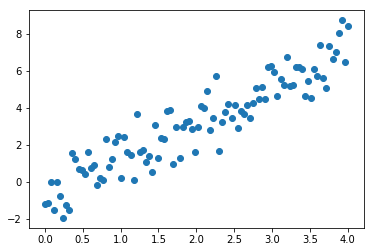

In [2]:
N = 100
tau_,w_,b_ = 1,2,-1

x_ = np.linspace(0,4,N)
y_ = np.random.normal(w_*x_+b_, 1/np.sqrt(tau_))

scatter(x_,y_);

**1. feladat.** Definiálja a feltételes eloszlásból mintavételező függvényeket $\tau$-ra, $w$-re és $b$-re (azaz függvények egy-egy valós számot adnak vissza).

In [3]:
def sample_tau(y, x, w, b, alpha, beta):
    alpha_new = alpha + len(y)/2.0
    beta_new = beta + np.sum((y-(w*x+b))**2)/2.0
    return np.random.gamma(alpha_new, 1.0/beta_new)

def sample_w(y, x, b, tau, lambda_w):
    prec = lambda_w + tau*np.sum(x*x)
    mean = tau*np.sum((y-b)*x)
    return np.random.normal(mean/prec, 1.0/np.sqrt(prec))

def sample_b(y, x, w, tau, lambda_b):
    prec = lambda_b + tau*len(y)
    mean = tau*np.sum(y-w*x)
    return np.random.normal(mean/prec, 1.0/np.sqrt(prec))

**2. feladat.** Definiálja a Gibbs-mintavételt megvalósító függvényt. A függvény adja vissza a mintákat, azaz egy $3 \times I$ mátrixot, ahol $I$ az iterációk száma, a sorok pedig $\tau$, $w$ és $b$ összegyűjött értékeit tartalmazzák.

In [4]:
def gibbs(y, x, iters, burn_in):
    w0,b0,tau0 = 0,0,1
    w,b,tau    = w0,b0,tau0
    
    smp = np.zeros((iters,3))
    
    for it in range(burn_in):
        w   = sample_w(y, x, b, tau, 1.0)
        b   = sample_b(y, x, w, tau, 1.0)
        tau = sample_tau(y, x, w, b, 2.0, 1.0)
    
    for it in range(iters):
        w   = sample_w(y, x, b, tau, 1.0)
        b   = sample_b(y, x, w, tau, 1.0)
        tau = sample_tau(y, x, w, b, 2.0, 1.0)
        
        smp[it] = [tau,w,b]
        
    return smp.T

**3. feladat.** Végezze el a következtetést, ábrázolja hisztogramon a mintákat. Milyen jól közelíti a gyűjtött minták átlaga a paraméterek valódi értékét?

1.166312603734241 1.9430698570938285 -0.7153747042274121


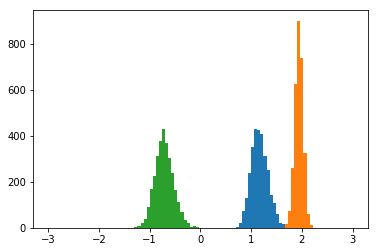

In [5]:
iters   = 3000
burn_in = 5000
smp     = gibbs(y_,x_,iters,burn_in)

bins = np.linspace(-3,3,100)
for i in range(3):
    hist(smp[i],bins=bins);

tau,w,b = np.mean(smp,axis=1)
print(tau,w,b)

**4. feladat.** Ábrázolja a tanult egyenest (szórással együtt), felhasználva a gyűjtött minták átlagát.

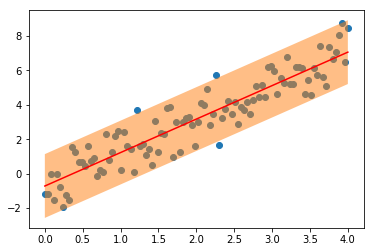

In [6]:
m = w*x_+b
s = 2/sqrt(tau)

scatter(x_,y_)
fill_between(x_,m-s,m+s,alpha=.5)
plot(x_,m,'r');

**5. feladat.** Trace plot-nak nevezzük a gyűjtött minták ábrázolását az idő függvényében. Ez információt nyújt arról, hogy a Markov-lánc mennyire hatékonyan járja be a paraméterteret (mixing). Ábrázolja a trace plotot mindhárom változóra, vizsgálja meg a mixinget.

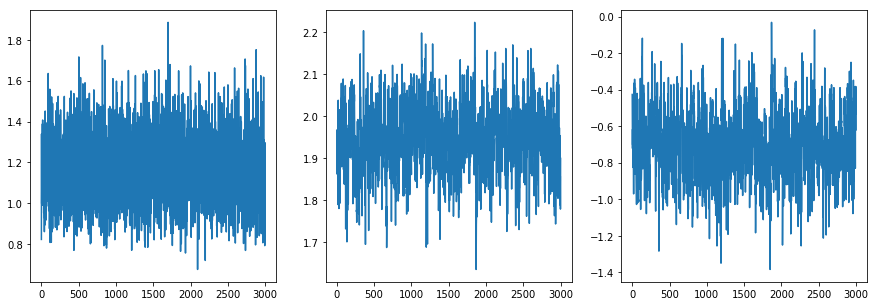

In [7]:
f,ax = subplots(1,3)
f.set_size_inches(15,5)
for i in range(3):
    ax[i].plot(smp[i])

**6. feladat (szorgalmi).** Vizsgálja meg a konvergenciát. Ehhez implementálja a Geweke--Brooks plotot, majd ábrázolja mindhárom változóra.